Prianka Kibria 

3.25.22

We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original dataset with the goal of preventing data leakage.  

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.  

Identify the target (X) and features (y): 

Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

Perform a train test split 

Create a pre processing pipeline to prepare the dataset for Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn import preprocessing

In [ ]:
set_config(display='diagram')

In [ ]:
path = ('/content/drive/MyDrive/data/sales_predictions.csv')
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* Outlet size - ordinal
* Item Identifier - nominal
* Item Weight - numeric
* Item fat content - nominal
* Item visibility - numeric
* item type - nominal
* item mrp - numeric
* outlet identifier - nominal
* outlet establishment yr - numeric
* outlet loc type - nominal
* outlet type - nominal
* item outlet sales - numeric

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna(axis=0, subset=['Item_Weight','Outlet_Size'])
df.isnull().values.any()

False

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)
df.replace(['Reg', 'reg'], ['Regular', 'Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Fat_Content'].unique()


array([0, 1])

In [ ]:
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Item_Type'].unique()

array([ 4, 14, 10,  9,  0, 13,  6,  2,  8,  5,  7,  3, 15,  1, 11, 12])

In [ ]:
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [ ]:
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Type'].unique()

array([0, 1])

In [ ]:
df['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].replace({'High': 2, 'Small': 0, 'Medium': 1}, inplace = True)

In [ ]:
df['Outlet_Size'].value_counts()

0    1860
1    1858
2     932
Name: Outlet_Size, dtype: int64

In [ ]:
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include = 'object')

In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
scaler = StandardScaler()

ohe_tuple = (ohe, cat_selector)


In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0c73e90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0c73cd0>)])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0c73e90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0c73cd0>)])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are ', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are  float64


shape of data is (3487, 9)




array([[-1.61873556, -0.73128047, -0.80142192, ...,  0.26115811,
        -1.12318196, -0.50429807],
       [ 1.6567808 , -0.73128047,  1.06509895, ...,  0.26115811,
        -1.12318196, -0.50429807],
       [-0.49444827,  1.36746439,  1.49877652, ...,  0.26115811,
         1.11037121,  1.98295423],
       ...,
       [ 0.28752511, -0.73128047,  0.43911456, ...,  0.26115811,
         1.11037121,  1.98295423],
       [ 0.21264393, -0.73128047, -0.69794226, ...,  0.26115811,
        -1.12318196, -0.50429807],
       [-0.08688075, -0.73128047, -0.28145496, ...,  1.598395  ,
         1.11037121, -0.50429807]])

In [ ]:
#OHE Ordinal
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)
# create a subset of data for only categorical columns
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)
#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe




array([], shape=(3487, 0), dtype=float64)

In [ ]:
#convert to dataframe
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

""
0
1
2
3
4
...
3482
3483
3484
3485


In [ ]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')
# isolate the numeric columns
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# re-combine the train and test sets on axis 1 (columns)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,5.440,0,0.025520,4,238.7538,1999,1,0,0
1,20.750,0,0.108879,13,161.5578,1999,1,0,0
2,10.695,1,0.128247,4,121.8440,2009,1,2,1
3,15.750,0,0.166514,4,38.0506,2009,1,2,1
4,11.500,1,0.000000,4,88.2540,1997,0,0,0
...,...,...,...,...,...,...,...,...,...
3482,12.600,0,0.024293,4,33.4874,2009,1,2,1
3483,19.850,1,0.020961,13,62.0194,2009,1,2,1
3484,14.350,0,0.080922,0,80.0960,2009,1,2,1
3485,14.000,0,0.030141,6,216.0192,1999,1,0,0


In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()


# Use 2 tuples, one for numeric and one for categorical
ohe_tuple = (ohe, cat_selector)
scaler_tuple = (scaler, num_selector)

# Combine the pipelines in a ColumnTransformer with the appropriate column selectors
transformer = make_column_transformer(scaler_tuple, ohe_tuple, remainder='passthrough')

In [ ]:
transformer.fit(X_train)
final_cols = transformer.get_feature_names_out()

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model. Evaluate the performance of your model based on r^2. Evaluate the performance of your model based on rmse.

In [ ]:
# instantiate a baseline model using the 'mean' strategy
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
# put your ColumnTransformer and the baseline model into a pipeline
base_pipe = make_pipeline(transformer, dummy)

# fit your pipe onto the training data
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0a9ffd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0a9f650>)])),
                ('dummyregressor', DummyRegressor())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# define a function that takes true and predicted values as arguments

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')


# and prints all 4 metrics

In [ ]:
# find MAE, MSE, RMSE and R2 on the baseline model for both the train and test data
print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE: 1,194.96 
 MSE: 2,250,745.79 
 RMSE: 1,500.25 
 R2: 0.00 

 Test Evaluation
MAE: 1,196.68 
 MSE: 2,221,487.68 
 RMSE: 1,490.47 
 R2: -0.00 


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = make_pipeline(transformer, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0a9ffd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8de0a9f650>)])),
                ('linearregression', LinearRegression())])

In [ ]:
print('Train Evaluation')

eval_model(y_train, lin_reg.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
MAE: 810.63 
 MSE: 1,202,379.95 
 RMSE: 1,096.53 
 R2: 0.47 

 Test Evaluation
MAE: 783.12 
 MSE: 1,135,850.48 
 RMSE: 1,065.76 
 R2: 0.49 


2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)


In [ ]:
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print('The train score is', train_score)
print('The test score is',test_score)


The train score is 1.0
The test score is -0.13001285710966148


In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()


26

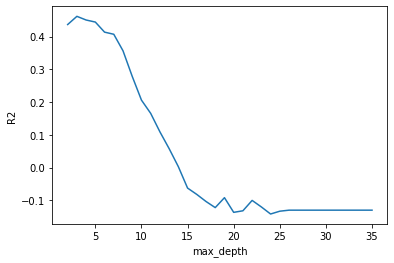

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');




From the plot above it looks like the best score for the model is when the parameter max depth is 3.

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_3 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_3.fit(X_train, y_train)
train_3_score = dec_tree_3.score(X_train, y_train)
test_3_score = dec_tree_3.score(X_test, y_test)
print(train_3_score)
print(test_3_score)


0.45763621802151966
0.4616873214411812


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend? Justify your recommendation. 4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

The linnear regression model is a good fit because the bias/variance are not too far off as well as it is as close as we can get to 50% and to the original model.


#visualizations

Text(0.5, 1.0, 'How Sales Have Changed Over Time)')

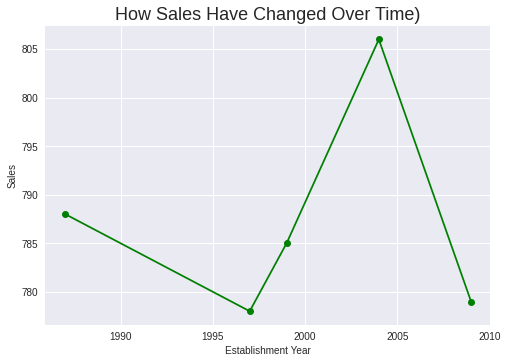

In [ ]:
numberuniqueyr = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()
uniqueyr = list(numberuniqueyr.index)
numbersales_yr = list(numberuniqueyr.values)

plt.style.use('seaborn')
plt.plot(uniqueyr, numbersales_yr, c='green', marker = 'o')
plt.xlabel('Establishment Year', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('How Sales Have Changed Over Time)', fontsize = 18)

Text(0.5, 1.0, 'Outlet Type vs Sales')

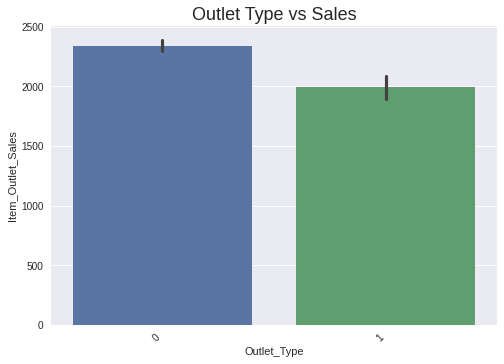

In [ ]:
import seaborn as sns

sns.barplot(data=df, x='Outlet_Type', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Outlet Type vs Sales', fontsize = 18)


Text(0.5, 1.0, 'Sales Based On Item Type')

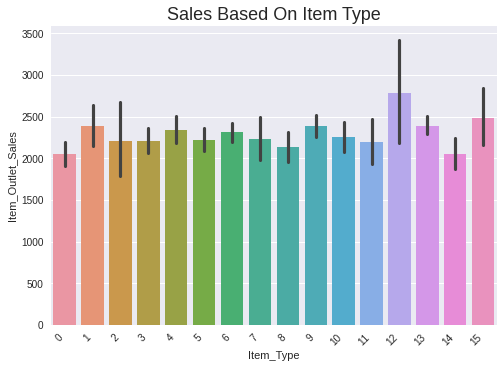

In [ ]:
sns.barplot(data=df, x='Item_Type', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Sales Based On Item Type', fontsize = 18)

Text(0.5, 1.0, 'Sales Based On Item Fat Content')

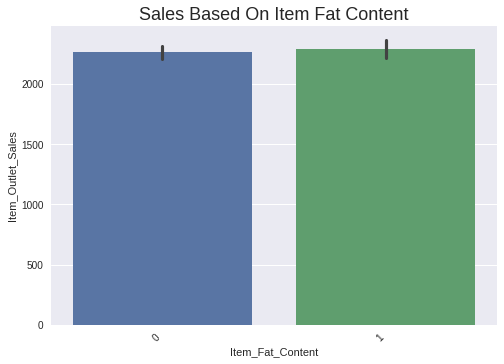

In [ ]:
sns.barplot(data=df, x='Item_Fat_Content', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Sales Based On Item Fat Content', fontsize = 18)

https://docs.google.com/presentation/d/1QjZZam7q0WXsBSF96xHxEBmhuRPpBSZU/edit?usp=sharing&ouid=114921905489288547532&rtpof=true&sd=true
